<a href="https://colab.research.google.com/github/saad1ibn2akhter/AI_Olympiad_problems_and_solutions/blob/main/house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [347]:
dfx = pd.read_csv('house.csv')
df =  dfx
test_df = pd.read_csv('house_test.csv')
df.head(6)
# df.columns

,ID,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,Footage_to_Lot_Ratio,Total_Rooms,Age_of_House,Garage_to_Footage_Ratio,Avg_Room_Size,Price,House_Orientation_Angle,Street_Alignment_Offset,Solar_Exposure_Index,Magnetic_Field_Strength,Vibration_Level
0,1,2028,2,3,1967,1.784790,2,2,1136.268444,5,58,0.000986,405.600000,11184.929934,16.722149,298.409571,235.502857,227.621575,129.770822
1,2,3519,5,3,1966,4.009947,0,10,877.567605,8,59,0.000000,439.875000,13941.315383,340.115663,43.878994,300.292055,46.684432,211.676987
2,3,4507,2,3,2014,4.122337,0,7,1093.311933,5,11,0.000000,901.400000,19686.885572,219.823215,24.542031,186.851621,10.837394,316.769266
3,4,3371,4,2,2000,1.580318,0,1,2133.114532,6,25,0.000000,561.833333,20964.530841,10.361763,147.970249,107.843644,175.620355,244.463978
4,5,2871,5,1,1974,3.426914,2,6,837.780090,6,51,0.000697,478.500000,12180.466278,329.344524,46.114469,357.571806,335.719756,135.850744
5,6,888,1,3,1972,3.286576,0,3,270.190039,4,53,0.000000,222.000000,3931.546293,240.320786,98.697840,97.707377,82.737621,268.277307


In [348]:
sum_values = test_df['Square_Footage'] + test_df['Garage_Size'] + test_df['Lot_Size']
print(sum_values)

task1df = pd.DataFrame({
    'subtaskID': [1] * len(test_df),
    'datapointID': test_df['ID'],
    'answer': sum_values
})

task1df.to_csv('output.csv', index=False)


0      4015.098092
1      2312.369622
2      4710.792970
3      4937.479598
4      3649.980987
          ...     
195    3770.520335
196     620.461372
197    4494.399155
198    1864.546672
199    3200.913258
Length: 200, dtype: float64


In [349]:
#subtask 2
df['Garage_to_Room_Ratio'] = df['Garage_Size'] / df['Total_Rooms']
df.head()
test_df['Garage_to_Room_Ratio'] = test_df['Garage_Size'] / test_df['Total_Rooms']


taskxdf = pd.DataFrame({
    'subtaskID':[2]*len(test_df),
    'datapointID':test_df['ID'],
    'answer':test_df['Garage_to_Room_Ratio'],
})
taskxdf.to_csv('output.csv',index=False , mode='a' , header=False)



In [350]:
#subtask 3
df['Magnetic_Field_Strength'].head(3)
x =  (test_df['Solar_Exposure_Index']-test_df['Vibration_Level'])/test_df['Magnetic_Field_Strength']
df['Env_Stability_Index'] = x
df.head(2)

task2df = pd.DataFrame({
    'subtaskID':[3]*len(test_df),
    'datapointID':test_df['ID'],
    'answer':x
})
task2df.to_csv('output.csv',index=False , mode='a' , header=False)


In [351]:
#subtask 4
avg_floor_sq = df['Square_Footage'].mean()
print(avg_floor_sq)

df['Area_Deviation'] = (df['Square_Footage'] - avg_floor_sq).abs()
df.head(2)


task2df = pd.DataFrame({
    'subtaskID':[4]*len(df),
    'datapointID':df['ID'],
    'answer':df['Area_Deviation']
})
task2df.to_csv('output.csv',index=False , mode='a' , header=False)




2813.9


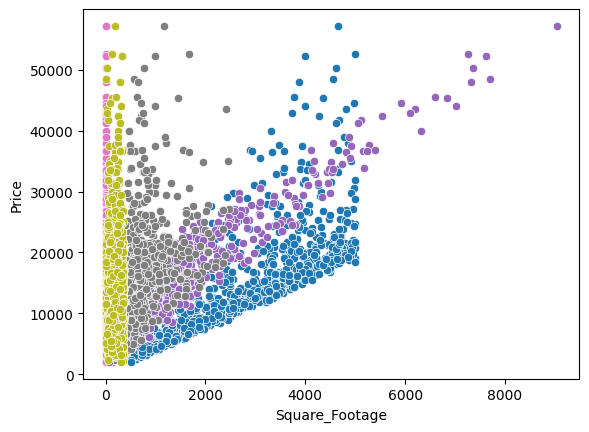

In [352]:
#subtask 5 : main part

columns = [ 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Neighborhood_Quality',
       'Footage_to_Lot_Ratio', 'Total_Rooms',
       'Garage_to_Footage_Ratio', 'Avg_Room_Size',
       'House_Orientation_Angle']

for c in columns:
  sns.scatterplot(x=df[c],y = df['Price'],data=df )
  # plt.show()


In [353]:
X = df[columns]
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()

model.fit(X,y)
yhat = model.predict(X_scaled)
print("r2_score (linear)  : "  ,r2_score(y,yhat),"%")
print(yhat[0:10])



r2_score (linear)  :  -38.61898888596006 %
[-47903.32579269  45855.97986523  45915.48482869  45916.23482343
 -20356.42216467  45926.57115037 -90584.51543027  45953.11169465
  45874.19549574  19256.63448793]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [354]:

X_test = test_df[columns]
X_test_scaled = scaler.transform(X_test)


yhat2 = model.predict(X_test)


task5df = pd.DataFrame({
    'subtaskID': [5]*len(test_df),
    'datapointID': test_df['ID'],
    'answer': yhat2
})


task5df.to_csv('output.csv', index=False, mode='a', header=False)

